# Notebook 6 - Neural Networks (MLP)

CSI4106 Artificial Intelligence  
Fall 2020  
Prepared by Julian Templeton and Caroline Barrière

***INTRODUCTION***:  

We are going into the medical domain for this notebook. The supervised classification task tackled in this notebook is about diabetes patient readmission to a hospital, provided a certain set of features describing their physical state, the procedure they went through during their stay, the medications they take, etc.

Any *readmitted patient* is very costly for a medical system. It shows to some extent, that the patient was discharged before having fully recovered. The dataset we explore splits readmission into 3 values: before 30 days, after 30 days, and none.  Understanding what conditions brings patients back to the hospital within 30 days is very important for a medical system, as these cases should be minimized.

This notebook will allow you to pursue your understanding of experimental set-up for supervised machine learning, in particular supervised classification through the use of multi-layer perceptrons.

We will make use of three packages: (1) **scikit-learn**, a great machine learning package, which you've experimented with in the last notebook, (2) **pandas**, a must-have for data science, and (3) **matplotlib** which is a great plotting library (pip install matplotlib).  Make sure you have the LATEST version of scikit-learn (at least version >= 0.20), otherwise some functions (the one-hot-encoder) will not work.

As this is your 6th notebook this semester, some instructions will be a bit less explicit and may require looking at some online official documentation. If you have any assumptions state them and think about how to handle the questions.

***HOMEWORK***:  
Go through the notebook by running each cell, one at a time.  
Look for **(TO DO)** for the tasks that you need to perform. Do not edit the code outside of the questions which you are asked to answer unless specifically asked. Once you're done, Sign the notebook (at the end of the notebook), and submit it.  

*The notebook will be marked on 30.  
Each **(TO DO)** has a number of points associated with it.*
***

**1. Obtaining the dataset**

First, read the description of the dataset on Diabetes Readmission (https://www.kaggle.com/brandao/diabetes).

Next download the dataset from the UCI archive (click *Data Folder* --> download *dataset_diabetes.zip*):
https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

Unzip the file *dataset_diabetes.zip* and there should be a file called *diabetic_data.csv* which we will use for our experiments. The file must be located at *dataset_diabetes/diabetic_data.csv* from the same directory as this notebook.

**2. Exploring the dataset**  
We will use the package *pandas* to read the csv file. Pandas will create a data structure called a dataframe, which will contain all the data. Dataframes are a crucial data structure that allows makes it very easy to analyze the data that you are working with, retrieve subsets of the data based on search conditions, and utilize the data in Machine Learning algorithms.

If you get some errors when you import the packages, it's because they are not installed... make sure you do *pip install package_name* (or whichever method you have been using to install the packages) at the command prompt to have access to these packages.

In [2]:
# Import the required packages for data analysis and machine learning
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

The following code reads the csv file into a dataframe and shows the top ten rows from the read data.  
Note that ? means that the value is *missing* from the dataset.

In [3]:
# Read the dataset, show top ten rows
X = pd.read_csv("dataset_diabetes/diabetic_data.csv")
X.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Show all attributes
list(X)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [5]:
# Examples of data exploration
print(X.shape)
print(X['race'].value_counts())

(101766, 50)
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


**(TO DO) Q1 - 3 marks**  
Inspired by the code above, *write code* to answer the following questions (not just manually printing a number without finding that number in the code). Your code must help in finding the answer. Print the question that you are answering along with the answer that the code helped find (can manually write specific code, as long as the code helps to get the answer).

1. How many examples are in the dataset?
2. How many features are in the dataset?
3. How many target classes are in the dataset?
4. What are the possible weight ranges (including ?), and the number of examples in each?
5. What are the prior probabilities of each class (NO, <30, >30)?
6. Are there any patients present in the dataset more than 25 times?

In [6]:
### YOUR CODE -- Write which question it answers
# 1. How many examples are in the dataset? 
print("Number of examples: " + str(X.shape[0]))
# 2. How many features are in the dataset?
print("Number of features: " + str(X.shape[1] - 1))
# 3. How many target classes are in the dataset?
print("Number of target classes " + str(X['readmitted'].nunique()))
# 4. What are the possible weight ranges (including ?), and the number of examples in each?
print("Possible weight ranges(including ?):")
print(X['weight'].value_counts())
# 5. What are the prior probabilities of each class (NO, <30, >30)?
print("Probabilities of each class:")
print(X['readmitted'].value_counts().sort_index()/len(X))
# 6. Are there any patients present in the dataset more than 25 times?
if(X['patient_nbr'].value_counts().max() > 25):
    print("The are at least one patient in the dataset with more than 25 occurences")
else: 
    print("The are no patients in the dataset with more than 25 occurences")

Number of examples: 101766
Number of features: 49
Number of target classes 3
Possible weight ranges(including ?):
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64
Probabilities of each class:
<30    0.111599
>30    0.349282
NO     0.539119
Name: readmitted, dtype: float64
The are at least one patient in the dataset with more than 25 occurences


**3. Feature Selection**  
Now that we have taken a look into our data and played with it, we will decide which features would be suitable to use with our model.

Feature selection is just as important as tuning a model (choosing hyperparameters such as the number of layers and their sizes). We need to be sure to choose high quality features that best represent our data in order to maximize the performance of our model. Simply putting every feature or selecting some without analyzing them may provide worse results. Thus, we need to consider which features to use by looking at the data itself to see if it would be a good match.

Some issues when working with data include:
1. Is the data well distributed? That is, does it contain enough variety to provide a good split on the data.
2. Are there missing values? The more missing values --> the less well these will work as features for many Machine Learning algorithms. Here, we will not focus on this issue, but it is important to know.
3. Does this data represent our dataset well.
4. Does the data work well with our selected algorithm (here is does).

**(TO DO) Q2 - 4 marks**   
In this notebook we will work with the following features along with a few others:  
1. gender 
2. age 
3. weight 
4. num_medications

Explore each of the specified features by:   

1) Plotting the distribution (histogram using kind="hist" for numerical data or bar plots using kind="barh" for categorical data) and write if the data is well distributed   
2) Identifying the number of missing/unknown/invalid values

Remember, if you have any assumptions that you need to state, state them.

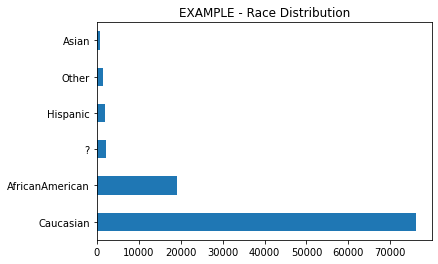

(Example.1): Is the above output well distributed? No it is not. This feature is highly imbalanced.
(Example.2): There are 2273 missing values labelled as '?'.
------------------------------ ^ Example ^ ------------------------------



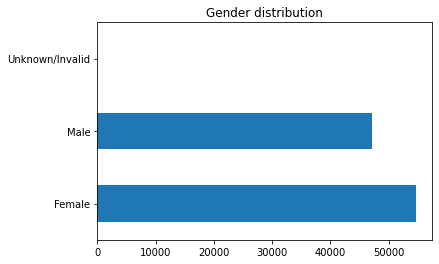

(1.1): The feature 'gender' is well distributed. Both possible values, male and female, represent almost the same number of samples each.
(1.2): There are 3 unknown/invalid values.


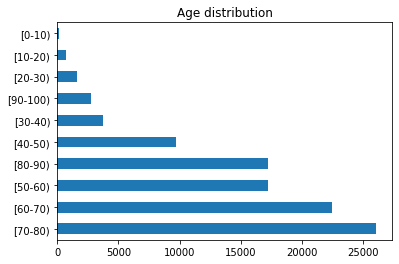

(2.1): The feature 'age' is very imbalanced.
(2.2): There are no missing values


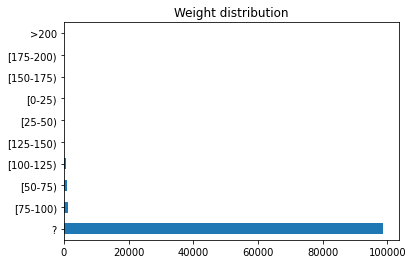

(3.1): The feature 'weight' is not well distributed.
(3.2): There are approximately 10000 (98569) missing values.


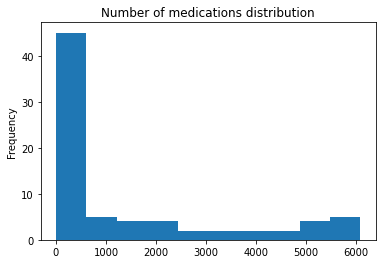

(4.1): The feature 'num_medications' is not well distributed.
(4.2): There are no missing values.


In [7]:
# Example for the feature "race"
plt.figure() # Creates a new figure
X["race"].value_counts().plot(kind="barh", title="EXAMPLE - Race Distribution")
plt.show()
print("(Example.1): Is the above output well distributed? No it is not. This feature is highly imbalanced.")
print("(Example.2): There are 2273 missing values labelled as '?'.")

print("------------------------------ ^ Example ^ ------------------------------\n")

# MODIFY AND ANSWER THE BELOW BASED ON THE EXAMPLE ABOVE.
# gender
X['gender'].value_counts().plot(kind="barh", title="Gender distribution")
plt.show()
print("(1.1): The feature 'gender' is well distributed. Both possible values, male and female, represent almost the same number of samples each.")
print("(1.2): There are 3 unknown/invalid values.")
# age
X['age'].value_counts().plot(kind="barh", title="Age distribution")
plt.show()
print("(2.1): The feature 'age' is very imbalanced.")
print("(2.2): There are no missing values")
# weight
X['weight'].value_counts().plot(kind="barh", title="Weight distribution")
plt.show()
print("(3.1): The feature 'weight' is not well distributed.")
print("(3.2): There are approximately 10000 (98569) missing values.")
# num_medications
X['num_medications'].value_counts().plot(kind="hist", title="Number of medications distribution")
plt.show()
print("(4.1): The feature 'num_medications' is not well distributed.")
print("(4.2): There are no missing values.")

**4. Preparing the dataset for experimentation**

We will do different steps to prepare the data for experimentations:  (1) extracting the class we wish to predict, (2) splitting the dataset into a training and a test set

In [8]:
# This can ONLY BE DONE ONCE, as we pop the values into a new variable to be used as predicted class
y = X.pop("readmitted").values

In [10]:
# split the large dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
# Look at the shape of the outputs
print(X_train.shape)
print(y_test.shape)
y_test.head(10)

(81412, 49)
(20354,)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [51]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# Setting up our one-hot encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Since the dataset is quite large, try with a subset of features
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

# Make a copy of the training set containing only the chosen features
X_train_sf = X_train[featureSet].copy()
X_test_sf = X_test[featureSet].copy()

# IF you wanted to try with the full dataset, try to redo the steps with this (optional - takes a lot of time)
# X_train_allf = X_train[:].copy()
# X_test_allf = X_test[:].copy()

# Perform the one-hot encoding using our one-hot encoder on the selected feature set
ohe.fit(X_train_sf)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [52]:
# The one-hot-encoder renames the features. Let's take a look at the new names.
feature_names = ohe.get_feature_names()
print(feature_names)

['x0_?' 'x0_AfricanAmerican' 'x0_Asian' 'x0_Caucasian' 'x0_Hispanic'
 'x0_Other' 'x1_Female' 'x1_Male' 'x1_Unknown/Invalid' 'x2_[0-10)'
 'x2_[10-20)' 'x2_[20-30)' 'x2_[30-40)' 'x2_[40-50)' 'x2_[50-60)'
 'x2_[60-70)' 'x2_[70-80)' 'x2_[80-90)' 'x2_[90-100)' 'x3_>200' 'x3_?'
 'x3_[0-25)' 'x3_[100-125)' 'x3_[125-150)' 'x3_[150-175)' 'x3_[175-200)'
 'x3_[25-50)' 'x3_[50-75)' 'x3_[75-100)' 'x4_1' 'x4_2' 'x4_3' 'x4_4'
 'x4_5' 'x4_6' 'x4_7' 'x4_8' 'x4_9' 'x4_10' 'x4_11' 'x4_12' 'x4_13'
 'x4_14' 'x5_1' 'x5_2' 'x5_3' 'x5_4' 'x5_5' 'x5_6' 'x5_7' 'x5_8' 'x5_9'
 'x5_10' 'x5_11' 'x5_12' 'x5_13' 'x5_14' 'x5_15' 'x5_16' 'x5_17' 'x5_18'
 'x5_19' 'x5_20' 'x5_21' 'x5_22' 'x5_23' 'x5_24' 'x5_25' 'x5_26' 'x5_27'
 'x5_28' 'x5_29' 'x5_30' 'x5_31' 'x5_32' 'x5_33' 'x5_34' 'x5_35' 'x5_36'
 'x5_37' 'x5_38' 'x5_39' 'x5_40' 'x5_41' 'x5_42' 'x5_43' 'x5_44' 'x5_45'
 'x5_46' 'x5_47' 'x5_48' 'x5_49' 'x5_50' 'x5_51' 'x5_52' 'x5_53' 'x5_54'
 'x5_55' 'x5_56' 'x5_57' 'x5_58' 'x5_59' 'x5_60' 'x5_61' 'x5_62' 'x5_63'
 'x5_64

In [53]:
# We can now encode the training and test set with the new features
X_train_sf_encoded = ohe.transform(X_train_sf)
X_test_sf_encoded = ohe.transform(X_test_sf)

**(TO DO) Q3 - 1 mark**   
How many features are there now, after the one-hot-encoder? Why so many? Show the shape of the training set now.

In [56]:
# How many features are there now (must get from code)?
print("The number of features: " + str(X_train_sf_encoded.shape[1]))
# Why so many?
print("There are more features because of the one-hot encoding applied on the training set")
# Show the shape of the training set after the one-hot encoding.
print(X_train_sf_encoded.shape)

The number of features: 242
There are more features because of the one-hot encoding applied on the training set
(81412, 242)


**5. Baseline model**  
Now that we have setup our encoded features we will start by using a Logistic Regression Classifier to perform supervised learning on our dataset.

***5.1 Defining the Logistic Regression Classifier***   
First we will define our Logistic Regression Classifier with scikit learn.

In [57]:
# Import the Logistic Regression model from scikit and matplot
from sklearn.linear_model import LogisticRegression
import datetime

In [58]:
# Define the model
clf_lr = LogisticRegression(solver='lbfgs', multi_class="multinomial", max_iter=1000, random_state=1)

***5.2 Training the Logistic Regression Classifier***  
Now that the model is defined, we need to train our model with the train set to learn how to classify our target class *readmitted*.

In [64]:
# This function trains a given model and returns a list of scores
#   clf:     The untrained model to train
#   X_train: The encoded attributes of the training set
#   y_train: The target values of the training set
def train_model(clf, X_train, y_train, epochs=10):
    scores = []
    print("Starting training...")
    for i in range(1, epochs + 1):
        print("Epoch:" + str(i) + "/" + str(epochs) + " -- " + str(datetime.datetime.now()))
        clf.fit(X_train, y_train)
        score = clf.score(X_train, y_train)
        scores.append(score)
    print("Done training.")
    return scores

**(TO DO) Q4 - 1 mark**   
Looking at the function train_model, what is the *score* (clf.score())? You may need to look at the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for the LogisticRegression to understand this. Explain below.

Q4 - ANSWER HERE   
The score is the mean accuracy on the test data (X_train) and given labels (y_train).

In [65]:
# Now let's train the model (recall that we use the training set)
# We run for only one epoch and will only get one score
clf_lr_scores = train_model(clf_lr, X_train_sf_encoded, y_train, 1)
print(clf_lr_scores)

Starting training...
Epoch:1/1 -- 2020-10-30 22:01:49.643728
Done training.
[0.5435685156979315]


**(TO DO) Q5 - 2 marks**   
In the answer field below, describe what the output from the code below means and what the code is doing.  
Afterwards, give the accuracy of the printed results (just manually state it, no need to code).

In [68]:
# Show the prediction on the first 10 examples
y_predicted = clf_lr.predict(X_train_sf_encoded[0:10])
print(y_predicted)
print(y_train[0:10])
clf_lr.predict_proba(X_train_sf_encoded[0:10])

['NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']
['>30' 'NO' 'NO' 'NO' '>30' '<30' '<30' '<30' '>30' '>30']


array([[0.0611843 , 0.33363142, 0.60518428],
       [0.08749833, 0.26481702, 0.64768465],
       [0.06820072, 0.34940656, 0.58239273],
       [0.12208612, 0.34581359, 0.53210029],
       [0.09708962, 0.29895571, 0.60395467],
       [0.11742122, 0.36005872, 0.52252005],
       [0.08806264, 0.34986364, 0.56207372],
       [0.08065098, 0.29094272, 0.62840629],
       [0.09607918, 0.35276085, 0.55115998],
       [0.17708212, 0.4098245 , 0.41309338]])

TO DO - Answers   

1) Describe what y_predicted is:  y_predicted represents the values predicted by the clf_lr model using the 10 first samples of the training data (coming from X_train_sf_encoded) 

2) Describe what y_train[0:10] is: y_train [0:10] represents the first 10 target values

3) Describe clf_lr.predict_proba(X_train_sf_encoded[0:10]): this returns the probability estimates for each one of the 3 classes based on the 10 first samples of the training data

4) What is the accuracy of the printed results? 
-> Only 3 out of 10 predictions are correct

**5.3 Testing the Logistic Regression Model**   
Now that we have our trained model, let's test it on the test set.

**(TO DO) Q6 - 2 marks**   
Evaluate the model on the test set by computing it's *score* (recall how the score is computed when training) and compare that to the training set scores (you have this value from clf_lr_scores). Print which is better and give one reason why these results may have ended up this way.

In [71]:
# The test set is encoded in here: X_test_sf_encoded
# Need to compute test score, print it, compare to train score, and print which is better and why
test_sf_encoded_score = clf_lr.score(X_test_sf_encoded, y_test)
print("The score on the test set is: " + str(test_sf_encoded_score))
if(test_sf_encoded_score > clf_lr_scores[0]):
    print("The score is better on the test set than on the training set")
else: 
    print("The score is worse on the test set than on the training set")
print("Learning models usually perform better on data they have seen before (training data) than on data they haven't seen (test set)")
# ....

The score on the test set is: 0.5392060528643019
The score is worse on the test set than on the training set
Learning models usually perform better on data they have seen before (training data) than on data they haven't seen (test set)


**6. MLP**   
After working with our Baseline model, let's try using a Multi Layer Perceptron Classifier to try to perform supervised learning on our dataset.

***6.1 Defining the MLPClassifier***   
First we will define our MLPClassifier with scikit learn.

In [72]:
# Import the MLP model from scikit and matplot
from sklearn.neural_network import MLPClassifier

In [73]:
# Define the model
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=5, max_iter=120, learning_rate_init=0.01, warm_start=True)

**(TO DO) Q7 - 3 marks**   
Explain *in your own words* the parameters chosen above. What do they all mean and explain how the chosen values for each parameter will affect the model. For any that are unfamiliar, explore the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and just provide a short sentence on what the parameter does based on its description and your existing knowledge.      

Q7 - ANSWER HERE   

*solver:* lgbs is the solver for weight optimization that will be used

*alpha:*  1e-4 will be the alpha value used for regularization

*hidden_layer_size:*  the model will have 2 hidden layers, each with 150 nodes

*random_state:* if randomness is used, the fact that an int has been passed as a parameter will generate the same results for different calls 

*max_iter:*  the model will stop the learning process after 120 iterations

*learning_rate_init:* the initial learning rate used

*warm_start:* since this has been set to True, the solution of the previous call will be reused to fit as initialization

***6.2 Training, Testing, and Discussing the MLPClassifier***  
Now that the model is defined, we need to train our model with the train set to learn how to classify our target class *readmitted*. This time we will be training the MLP model for several epochs with an updated training algorithm. Finally we will plot our retrieved scores, discuss them, and compare them with with the Baseline Model.

In [74]:
# Plots the train and the test scores
def plotScores(scores_train, scores_test):
    # Plot the points
    plt.plot([i for i in range(len(scores_train))], scores_train)
    plt.plot([i for i in range(len(scores_test))], scores_test)
    # Setup the legend
    plt.legend(["Train scores", "Test Scores"])
    # Labels for the x and y axis
    plt.ylabel("Score")
    plt.xlabel("Epoch")
    plt.show()

**(TO DO) Q8 - 6 marks**   

***For all parts of this question, ensure that you have the full, correct output in your submission (do not clear the output here).***

1. You must define the function train_and_evaluate() below. This function must take as input a classifier, the training set, the testing set, and the number of epochs. Inspired from the provided function train_model(), train the model as usual (use 10 epochs as the default), but now track the scores from both the train and the test sets at each epoch. Return both of these results.  
2. Once defined, train clf_mlp with train_and_evaluate() for ten epochs.
3. Take the MLPClassifier results and plot them with the plotting function above (*plotScores*).   
4. Describe the behaviour of the scores found during the training. Did the train or the test set produce the best results? What do these results mean? 
5. Did the MLP do better or worse than the Baseline Logistic Regression Model (and by how much)? Why do you think that it did better/worse?
6. Here we track the *score* as we train the model. This is useful to track how the training is going. Given your previous answer on what the *score* is, what would be another useful metric to track while training these models. Specifically, what are we *minimizing* while training?

In [75]:
# TO DO part 1 - Create the train_and_evaluate function
def train_and_evaluate(classifier, X_train, y_train, X_test, y_test, epochs = 10):
    train_scores = []
    test_scores = []
    print("Starting training...")
    
    for i in range(1, epochs + 1):
        print("Epoch:" + str(i) + "/" + str(epochs) + " -- " + str(datetime.datetime.now()))
        classifier.fit(X_train, y_train)
        train_score = classifier.score(X_train, y_train)
        test_score = classifier.score(X_test, y_test)
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    print("Done training.")
    return train_scores, test_scores

In [76]:
# TO DO part 2
# Train for *10* epochs, NOT 1. This will take a while so be patient!
# You may see a warning message, this is because we defined clf_mlp to stop early if a condition is met.
# In reality, you would want the model to go for as long as it needs to appropriately learn from the training set.
train_scores_mlp, test_scores_mlp = train_and_evaluate(clf_mlp, X_train_sf_encoded, y_train, X_test_sf_encoded, y_test)

Starting training...
Epoch:1/10 -- 2020-10-31 11:15:34.517541


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:2/10 -- 2020-10-31 11:17:08.577495


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:3/10 -- 2020-10-31 11:18:46.653487


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:4/10 -- 2020-10-31 11:20:26.217019


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:5/10 -- 2020-10-31 11:22:10.039851


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:6/10 -- 2020-10-31 11:23:48.155456


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:7/10 -- 2020-10-31 11:25:26.086946


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:8/10 -- 2020-10-31 11:27:07.754509


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:9/10 -- 2020-10-31 11:29:02.103489


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:10/10 -- 2020-10-31 11:30:48.068631


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Done training.


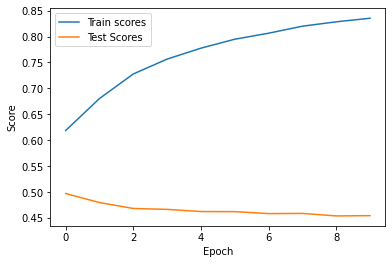

In [77]:
# TO DO part 3 - Visualize the results
plotScores(train_scores_mlp, test_scores_mlp)

TO DO part 4    
Describe the behaviour of the scores found during the training. Did the train or the test set produce the best results? What do these results mean?  

-> From the results I got, the training set performs way better than the testing set. In addition to that, the training set keeps getting better scores while the testing one keeps getting worse score as we do more epochs. These results mean that the model is overfitting the training data, which is why it keeps getting better scores the training data but get very bad results on unseen data (testing data)

TO DO part 5   
Did the MLP do better or worse than the Baseline Logistic Regression Model (and by how much)? Why do you think that it did better/worse?  

-> On the first epoch, the MLP did almost the same as the Baseline Logistic Regression Model. It did 10% better than the baseline model on the training set and even better as it went through more epochs. The MLP did slightly worse (roughly 4%) than the baseline model on the test set and did even worse as as it went through more epochs. I think the large differences were caused by the overfitting of the model

TO DO part 6   
Here we track the *score* as we train the model. This is useful to track how the training is going. Given your previous answer on what the *score* is, what would be another useful metric to track while training these models. Specifically, what are we *minimizing* while training?    

-> I think it will be useful to track the difference between the score from the training set and the score from the testing set. While training the model, we want it to be able to perform well on unseen data, therefore, we want to minimize the difference of performance on the training data and the testing/unseen data.

**7. Trying a slightly different model with different feature selection**  
Now that we have run through the Baseline and the MLP classifiers, let us try one more MLP with a smaller feature selection. This time you will be creating the model by with random features to use from our original list of features. The following TO DO gives an overview of the entire task.

**(TO DO) Q9 - 5 marks**   
First, insert a seed of your choice for the randomization.  
Create a new list of features containing a random four features from featureSet, we call this list randomFeatures. Then use that list to complete the encoding process using ohe_rand.   
Once done, use the train_and_evaluate() function to train the model with the new training set. Plot the results. Finally compare the train and test results from clf_rand (obtained here) with the results from clf_mlp (state which did better, posting the scores and the random feature set selected).

In [91]:
import random

# Setup a seed
random.seed(5)

# Setting up our one-hot encoder
ohe_rand = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Since the dataset is quite large, try with a subset of features
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

# TO DO - Select a random four unique features from the list featureSet
randomFeatures = random.sample(featureSet, 4)
print(randomFeatures)

# TO DO - Finish the remaining encoding process
X_train_rand = X_train[randomFeatures].copy()
X_test_rand = X_test[randomFeatures].copy()
ohe_rand.fit(X_train_rand)
X_train_rand_encoded = ohe_rand.transform(X_train_rand)
X_test_rand_encoded = ohe_rand.transform(X_test_rand)
# print(X_train_rand_encoded.shape)
# print(X_test_rand_encoded.shape)

['time_in_hospital', 'num_lab_procedures', 'age', 'num_medications']


In [92]:
clf_rand = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=5, max_iter=120, learning_rate_init=0.01, warm_start=True)

# TO DO - Train the model (this will take a little while! Grab a snack or find something to do), plot the results
train_scores_rand, test_scores_rand = train_and_evaluate(clf_rand, X_train_rand_encoded, y_train, X_test_rand_encoded, y_test)

Starting training...
Epoch:1/10 -- 2020-10-31 12:27:11.218476


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:2/10 -- 2020-10-31 12:28:44.262911


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:3/10 -- 2020-10-31 12:30:21.616172


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:4/10 -- 2020-10-31 12:31:57.592570


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:5/10 -- 2020-10-31 12:33:32.064505


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:6/10 -- 2020-10-31 12:35:09.631218


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:7/10 -- 2020-10-31 12:36:55.557981


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:8/10 -- 2020-10-31 12:38:56.608471


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:9/10 -- 2020-10-31 12:40:30.303666


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:10/10 -- 2020-10-31 12:42:06.983936


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Done training.


TO DO - State the random feature set obtained. Compare the train and test results from clf_rand to clf_mlp, posting the scores from both.   


Random feature set obtained: ['time_in_hospital', 'num_lab_procedures', 'age', 'num_medications']
Comparing the train and test results from clf_mlp:


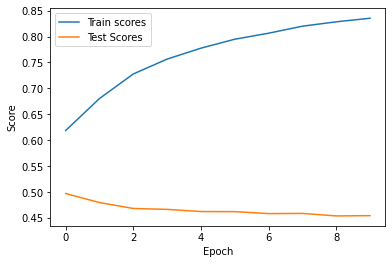

Comparing the train and test results from clf_rand:


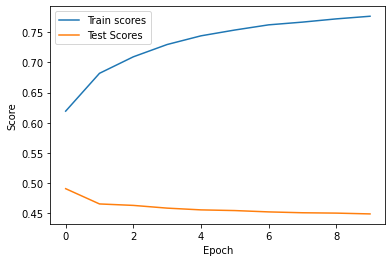

Conclusion for comparison: The results from both models, as show in the figures above, are not very different. In both cases, although I am not very sure, there is an overfitting issue.


In [101]:
print("Random feature set obtained: " + str(randomFeatures))
print("Comparing the train and test results from clf_mlp:")
plotScores(train_scores_mlp, test_scores_mlp)
print("Comparing the train and test results from clf_rand:")
plotScores(train_scores_rand, test_scores_rand)
print("Conclusion for comparison: The results from both models, as show in the figures above, are not very different. In both cases, although I am not very sure, there is an overfitting issue.")

**8. Looking at the loss curve**  
We will do one final run of a MLP, but this time we will use solver="SGD". Using this allows us to look at the loss curve during it's training.

In [103]:
clf_sgd = MLPClassifier(solver='sgd', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=1, max_iter=150, learning_rate_init=0.1, warm_start=True)

In [104]:
# Plots the loss from the trained model
# NOTE: clf.loss_curve_ only exists when using solver="SGD"
def plot_loss(clf):
    plt.plot(clf.loss_curve_)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

**(TO DO) Q10 - 3 marks**   
Train and evaluate the model using train_and_evaluate (for 1 epoch*) on X_train_sf_encoded and X_test_sf_encoded. Display the plot exhibiting the loss function when being trained. Briefly describe what the loss function represents (and why it's important).

Starting training...
Epoch:1/1 -- 2020-10-31 20:24:55.754086


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Done training.


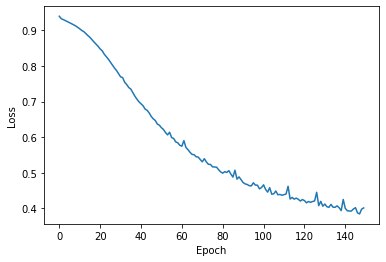

In [105]:
# Train the model for *1 epoch* (with X_train_sf_encoded and X_test_sf_encoded)
sgd_train_scores, sgd_test_scores = train_and_evaluate(clf_sgd, X_train_sf_encoded, y_train, X_test_sf_encoded, y_test, 1)
# Plot the loss of clf_sgd
plot_loss(clf_sgd)

TO DO - What does the loss curve represent and why is it important?   
The loss curve represents how bad the model's prediction was. In our case, the loss is represented for each iteration and from the plot above, the loss seems to go lower as we do more iterations, which means that the more iterations we do, the better our model gets. It is important to know what the loss is for a series of iterations to know if the learning is getting better (when the loss keeps getting lower) or worse (when the loss keeps getting higher).

**(TO DO) Optional - 0 marks, just for fun**   
Play around with the MLPClassifier by modifying the hyperparameters and selecting specific features to optimize the test score.   

**Another optional task is to use the Keras Scikit-Learn wrapper**  

You will need to pip install keras beforehand, but this will drastically reduce the training time for simple models such as the ones that we have worked with above. Below is just one example of how to create a model with this wrapper.  

```python   
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Dense(150, input_dim=241, activation="relu"))
    model.add(Dense(150, activation="relu"))
    model.add(Dense(3, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model
   
model = KerasClassifier(build_fn=create_model, epochs=10)
history = model.fit(X_train_sf_encoded, y_train)```

***SIGNATURE:***
My name is Ange Michaella Niyonkuru.
My student number is 8962161.
I certify being the author of this assignment.